<a href="https://colab.research.google.com/github/Quark-hadron/turkish_home_competition_ml/blob/main/Turkish_home_competition_ml_IPYNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! gdown --id 1DrfU6z9z9yXBBT2LuC-9z-ZvNV46AcAY

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1DrfU6z9z9yXBBT2LuC-9z-ZvNV46AcAY
To: /content/real_estate_data.csv
100% 46.3M/46.3M [00:00<00:00, 128MB/s]


In [2]:
import pandas as pd
import re
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge, Lasso
from xgboost import XGBClassifier, plot_importance, plot_tree,XGBRegressor
from sklearn.inspection import permutation_importance

In [3]:
plt.style.use('dark_background')

In [4]:
df = pd.read_csv('real_estate_data.csv')

<ipython-input-4-6b1caaca3e2d>:1: DtypeWarning: Columns (9,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('real_estate_data.csv')


In [5]:
df.head()

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency
0,1,Konut,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,3500.0,TRY
1,2,Konut,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,490000.0,TRY
2,3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,NaN,Fancoil,155000.0,TRY
3,4,Konut,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.0,İstanbul/Beşiktaş/Levent,NaN,Fancoil,32500000.0,TRY
4,5,Konut,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,1450000.0,TRY


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403487 entries, 0 to 403486
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 403487 non-null  int64  
 1   type               403487 non-null  object 
 2   sub_type           403487 non-null  object 
 3   start_date         403487 non-null  object 
 4   end_date           266298 non-null  object 
 5   listing_type       403487 non-null  int64  
 6   tom                403487 non-null  int64  
 7   building_age       376097 non-null  object 
 8   total_floor_count  375466 non-null  object 
 9   floor_no           368191 non-null  object 
 10  room_count         403487 non-null  object 
 11  size               257481 non-null  float64
 12  address            403487 non-null  object 
 13  furnished          0 non-null       float64
 14  heating_type       375517 non-null  object 
 15  price              402772 non-null  float64
 16  pr

Проверка на дубликаты, как видно их нет

In [7]:
df.duplicated().value_counts()

,count
False,403487


создадим маску для заменны символов в room_count на часто встречающее вырвжение, а после словарь где и будут отображаться знаки, которые мы меняем на выражения

In [8]:
mask = df['room_count'].value_counts(dropna=False).keys()[0]

In [9]:
plus_minus = {'+':mask, '-':mask, '/':mask, '*':mask,'**':mask}

In [10]:
df['room_count'][df['room_count'] == [ i for i in plus_minus.keys()][0]] = mask

<ipython-input-10-5c9478e728e4>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['room_count'][df['room_count'] == [ i for i in plus_minus.keys()][0]] = mask
<ipython-input-10-5c9478e728e4>:1: SettingWithCopyWarning: 
A value is trying to

вычислим выражения в room_count и результаты выражений запишем

In [11]:
df['room_count'] = [eval(i) for i in df['room_count']]

In [12]:
df.head()

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency
0,1,Konut,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,3,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,3500.0,TRY
1,2,Konut,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1,43.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,490000.0,TRY
2,3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,3,NaN,Tekirdağ/Çorlu/Reşadiye,NaN,Fancoil,155000.0,TRY
3,4,Konut,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,7,450.0,İstanbul/Beşiktaş/Levent,NaN,Fancoil,32500000.0,TRY
4,5,Konut,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,3,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,1450000.0,TRY


заменим все турецские слова на первое попавшее число в этих строках

In [13]:
def preprocessing_score(value):
    if isinstance(value,str):
      if 'arası' in value:
        return int(re.search(r'\d+', value).group(0))
      elif 've üzeri' in value:
        return int(re.search(r'\d+', value).group(0))
      elif 'Kot' in value:
        return int(re.search(r'\d+', value).group(0))
      else:
        return np.object_(value)
    return None

In [14]:
df['total_floor_count'] = df['total_floor_count'].apply(preprocessing_score)

In [15]:
df['floor_no'].value_counts()

,count
floor_no,
2,60914
3,32200
1,28569
Yüksek Giriş,24045
Müstakil,21165
4,21049
3,20490
Bahçe katı,19065
1,18187


в type всего одно уникальное значение значит использовать его для предсказания бессмысленно

In [16]:
df['type'].unique()

array(['Konut'], dtype=object)

удалим все бессполезные признаки для предсказания, т.к furnished потому что там все пустые значения, а значит оно не как не несет в себе какуюту информативность, end_date и start_date удалим пото му что мы не анализируем временные ряды,floor_no т.к слищком много бессмысленных слов, type - это тип, а он не применяется в предсказании, id то же, address - конкреттный адресс привязан к конкретному дому, это из - за этого в нашу модель попадет слишком много шума

In [17]:
df.drop(["end_date", "start_date",'furnished','floor_no','type','id','address'], axis = 1, inplace = True)

кодируем строковое представление данных в building_age

In [18]:
df['building_age'].value_counts()

,count
building_age,
0,140174
6-10 arası,50495
11-15 arası,32309
16-20 arası,31333
1,20355
4,19032
21-25 arası,18438
2,17466
3,15651


In [19]:
le = LabelEncoder()

In [20]:
df['building_age'] = le.fit_transform(df['building_age'].astype('str'))

In [21]:
df.head()

,sub_type,listing_type,tom,building_age,total_floor_count,room_count,size,heating_type,price,price_currency
0,Rezidans,2,30,0,20,3,90.0,Fancoil,3500.0,TRY
1,Daire,1,14,0,20,1,43.0,Fancoil,490000.0,TRY
2,Daire,1,30,0,1,3,NaN,Fancoil,155000.0,TRY
3,Rezidans,1,30,7,20,7,450.0,Fancoil,32500000.0,TRY
4,Rezidans,1,30,0,20,3,90.0,Fancoil,1450000.0,TRY


посмотрим на график плотности building_age

<ipython-input-22-54035b2390f5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['building_age'],bins=20)


<Axes: xlabel='building_age', ylabel='Density'>

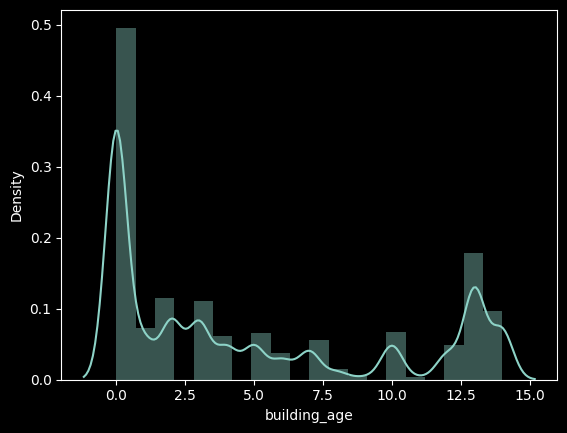

In [22]:
sns.distplot(df['building_age'],bins=20)

и на представление в метричесском пространстве

<Axes: ylabel='building_age'>

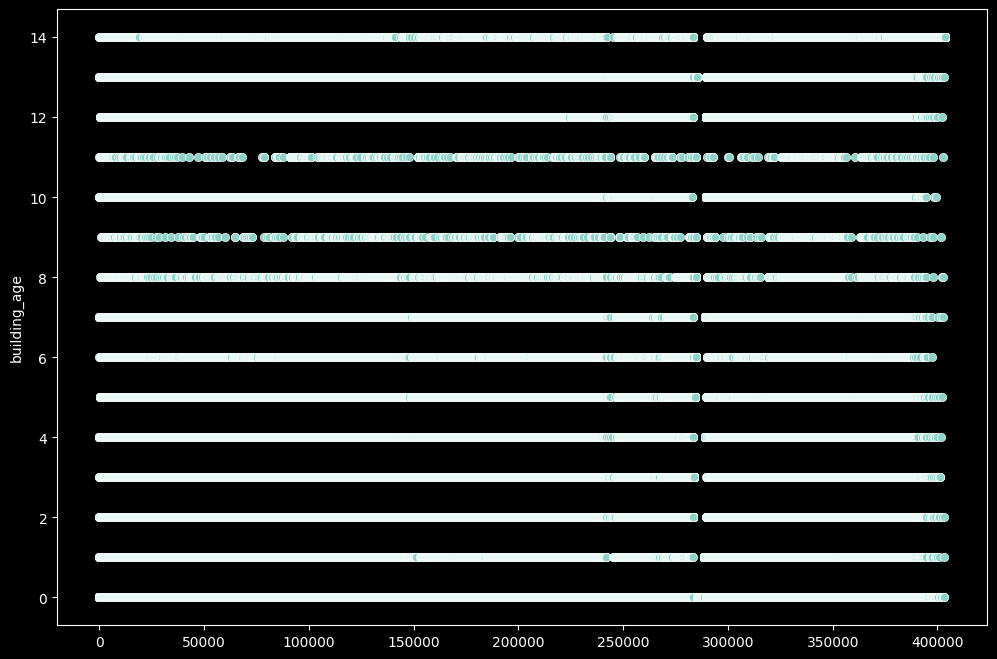

In [23]:
plt.figure(figsize=(12, 8))
sns.scatterplot(df['building_age'])

посмотрим на выбросы в size и в остальных признаках

<Axes: ylabel='size'>

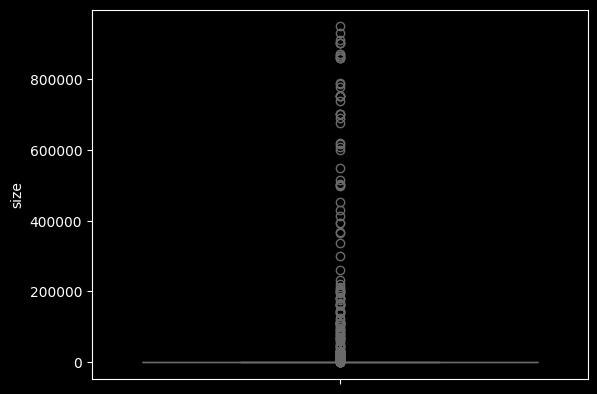

In [24]:
sns.boxplot(data=df,y='size')

<Axes: xlabel='building_age', ylabel='total_floor_count'>

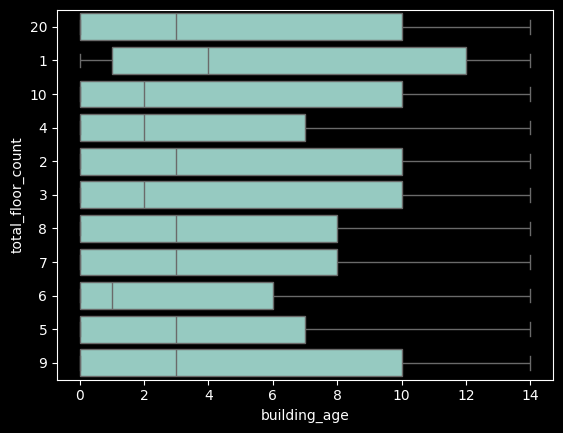

In [25]:
sns.boxplot(data=df, y='total_floor_count', x='building_age')

<Axes: ylabel='total_floor_count'>

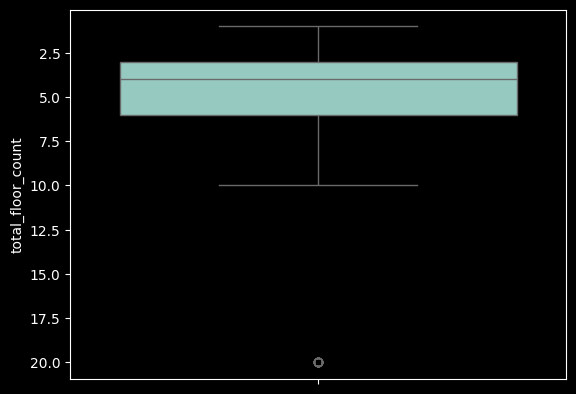

In [26]:
sns.boxplot(data=df,y='total_floor_count')

<Axes: xlabel='building_age', ylabel='heating_type'>

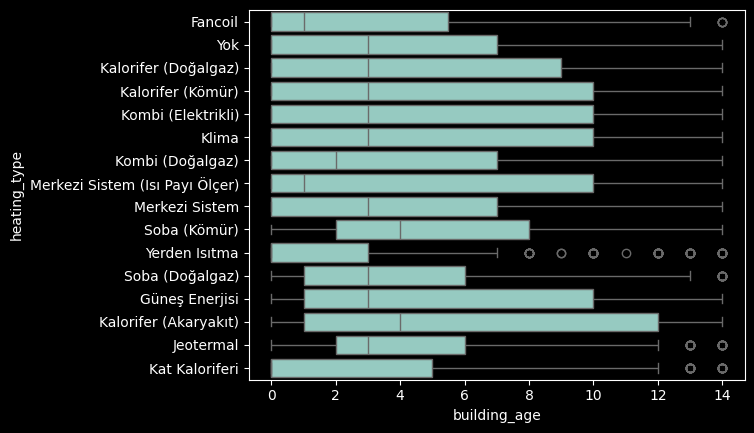

In [27]:
sns.boxplot(data=df, y='heating_type', x='building_age')

<Axes: ylabel='building_age'>

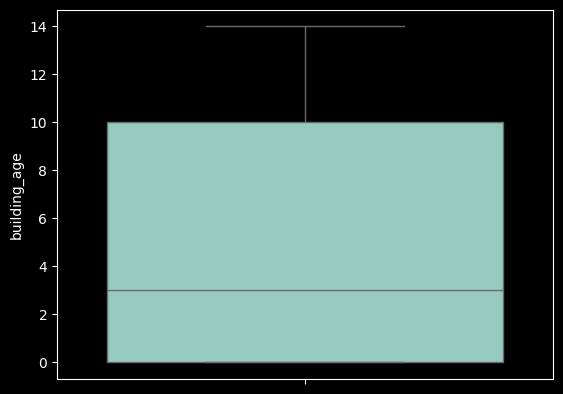

In [28]:
sns.boxplot(data=df,y='building_age')

<Axes: ylabel='room_count'>

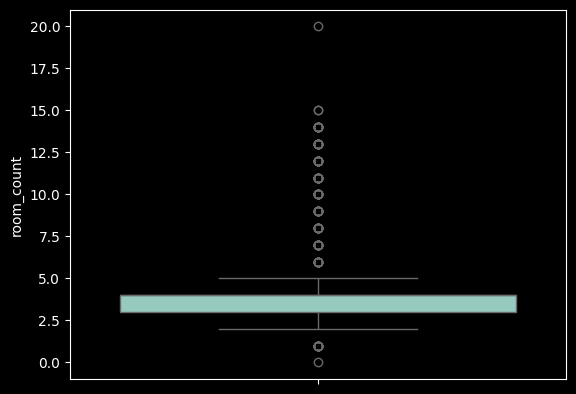

In [29]:
sns.boxplot(data=df,y='room_count')

удалим выбросы припомощи метода нахождения выбрасов IQR

In [30]:
def IQR_s():
  Q1_s = df['size'].quantile(0.25)
  Q3_s = df['size'].quantile(0.75)
  IQR_s = Q3_s - Q1_s
  SIQR_s = (Q1_s - 1.5 * IQR_s),(Q3_s + 1.5 * IQR_s)
  return SIQR_s

In [31]:
df.drop(df[df['size'] >=IQR_s()[1]].index,inplace=True)
df.drop(df[df['size'] <=IQR_s()[0]].index,inplace=True)

In [32]:
df.drop(df[df['size'] >=IQR_s()[1]].index,inplace=True)
df.drop(df[df['size'] <=IQR_s()[0]].index,inplace=True)

проверим на пустые значения

In [33]:
df.isna().sum()

,0
sub_type,0
listing_type,0
tom,0
building_age,0
total_floor_count,26928
room_count,0
size,146006
heating_type,26878
price,713
price_currency,713


заменим пустые значения, категориальнные на самое популярное, а дискретные на медиану, после закодируем все оставшиеся котигориальные переменые

In [34]:
df['total_floor_count'] = df['total_floor_count'].fillna(df['total_floor_count'].median())
df['price_currency'] = df['price_currency'].fillna(df['price_currency'].value_counts().keys()[0])
df['price'] = df['price'].fillna(df['price'].median())
df['size'] = df['size'].fillna(df['size'].median())
df['heating_type'] = df['heating_type'].fillna(df['heating_type'].value_counts().keys()[0])
df['price_currency'] = le.fit_transform(df['price_currency'])
le.classes_

array(['EUR', 'GBP', 'TRY', 'USD'], dtype=object)

In [35]:
df['heating_type'] = le.fit_transform(df['heating_type'])
le.classes_

array(['Fancoil', 'Güneş Enerjisi', 'Jeotermal', 'Kalorifer (Akaryakıt)',
       'Kalorifer (Doğalgaz)', 'Kalorifer (Kömür)', 'Kat Kaloriferi',
       'Klima', 'Kombi (Doğalgaz)', 'Kombi (Elektrikli)',
       'Merkezi Sistem', 'Merkezi Sistem (Isı Payı Ölçer)',
       'Soba (Doğalgaz)', 'Soba (Kömür)', 'Yerden Isıtma', 'Yok'],
      dtype=object)

In [36]:
df['sub_type'] = le.fit_transform(df['sub_type'])
le.classes_

array(['Daire', 'Komple Bina', 'Kooperatif', 'Köşk / Konak / Yalı',
       'Loft', 'Müstakil Ev', 'Prefabrik Ev', 'Rezidans', 'Villa',
       'Yalı Dairesi', 'Yazlık', 'Çiftlik Evi'], dtype=object)

посмотрим на первичный анализ и основной дата фрайм - очищеный

In [37]:
df.head()

,sub_type,listing_type,tom,building_age,total_floor_count,room_count,size,heating_type,price,price_currency
0,7,2,30,0,20,3,90.0,0,3500.0,2
1,0,1,14,0,20,1,43.0,0,490000.0,2
2,0,1,30,0,1,3,110.0,0,155000.0,2
4,7,1,30,0,20,3,90.0,0,1450000.0,2
5,7,1,30,4,10,2,45.0,0,780000.0,2


In [38]:
df.describe()

,sub_type,listing_type,tom,building_age,room_count,size,heating_type,price,price_currency
count,386136.000000,386136.000000,386136.000000,386136.000000,386136.000000,386136.000000,386136.000000,3.861360e+05,386136.000000
mean,0.738175,1.299617,57.214683,4.830469,3.595839,110.706383,8.304628,2.978920e+05,1.995546
std,2.277734,0.470441,44.614613,5.214693,1.004445,28.893654,1.969235,3.992296e+06,0.105458
min,0.000000,1.000000,0.000000,0.000000,1.000000,11.000000,0.000000,-2.500000e+02,0.000000
25%,0.000000,1.000000,29.000000,0.000000,3.000000,100.000000,8.000000,2.200000e+03,2.000000
50%,0.000000,1.000000,40.000000,3.000000,4.000000,110.000000,8.000000,1.940000e+05,2.000000
75%,0.000000,2.000000,90.000000,10.000000,4.000000,120.000000,8.000000,3.250000e+05,2.000000
max,11.000000,3.000000,180.000000,14.000000,20.000000,209.000000,15.000000,2.000000e+09,3.000000


посмотрим на график плотности для size видим купол, это значит, что данные более менее распределенны нормально

<Axes: xlabel='size', ylabel='Density'>

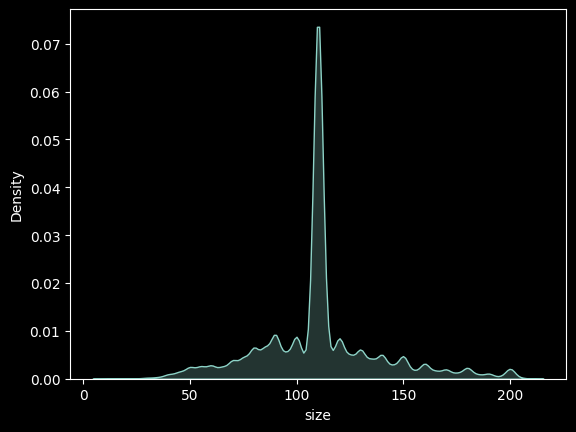

In [39]:
sns.kdeplot(df['size'],fill=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 386136 entries, 0 to 403486
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sub_type           386136 non-null  int64  
 1   listing_type       386136 non-null  int64  
 2   tom                386136 non-null  int64  
 3   building_age       386136 non-null  int64  
 4   total_floor_count  386136 non-null  object 
 5   room_count         386136 non-null  int64  
 6   size               386136 non-null  float64
 7   heating_type       386136 non-null  int64  
 8   price              386136 non-null  float64
 9   price_currency     386136 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 32.4+ MB


In [41]:
df['total_floor_count'] = df['total_floor_count'].astype('int64')

In [42]:
x = df[df.drop('building_age',axis=1).columns]
y = df['building_age']

In [43]:
df = df.astype('int64')

поделим на тренеровочную и тестувую выборку

In [44]:
train_x, test_x, train_y, test_y = train_test_split(x,y,random_state=100,test_size=0.3,stratify=y)

определим наилучшую модель для классификации

In [45]:
model = {
    'RandomForestClassifier':RandomForestClassifier(n_jobs=-1),
    'DecisionTreeClassifier':DecisionTreeClassifier(random_state=1),
    'KNeighborsClassifier':KNeighborsClassifier(n_jobs=-1),
    'XGBClassifier':XGBClassifier(n_estimators = 100, learning_rate = 0.3, n_jobs = -1, random_state = 1)
}
best_accuracy = 0
best_model = None

In [46]:
np.random.seed(1)
for name_model, model_cl in model.items():
    y_pred = model_cl.fit(train_x,train_y).predict(test_x)
    result_accuracy = accuracy_score(test_y,y_pred)
    print(f'{name_model}:{result_accuracy:.2f}')

    if  result_accuracy > best_accuracy:
        best_accuracy = result_accuracy
        best_model = model_cl
        best_model_name = name_model

print(f'{best_model_name} ----> {best_accuracy:.2f}')


RandomForestClassifier:0.42
DecisionTreeClassifier:0.37
KNeighborsClassifier:0.33
XGBClassifier:0.41
RandomForestClassifier ----> 0.42


лучшей моделью будет RandomForestClassifier т.К у нее саммый высокий показатель точности

In [47]:
np.random.seed(1)
best_model.fit(train_x,train_y)

RandomForestClassifier(n_jobs=-1)

обучаем

In [48]:
y_pred = best_model.predict(test_x)

In [49]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.72      0.61     40715
           1       0.29      0.19      0.23      5859
           2       0.31      0.27      0.29      9035
           3       0.31      0.28      0.29      8994
           4       0.27      0.17      0.21      5041
           5       0.27      0.22      0.24      5386
           6       0.27      0.20      0.23      3081
           7       0.26      0.17      0.21      4486
           8       0.28      0.19      0.23      1231
           9       0.28      0.15      0.20       387
          10       0.26      0.18      0.21      5445
          11       0.44      0.28      0.34       278
          12       0.25      0.15      0.19      3842
          13       0.33      0.30      0.31     14131
          14       0.47      0.48      0.47      7930

    accuracy                           0.42    115841
   macro avg       0.32      0.26      0.28    115841
weighted avg       0.39   

наш показатель 0,42 или 42%, с уменьшением возможных чисел показатель будет возрастать

In [50]:
feature_names = [i for i in x.columns]

посмотрим на матрицу графиков для понимания распределения всех признаков

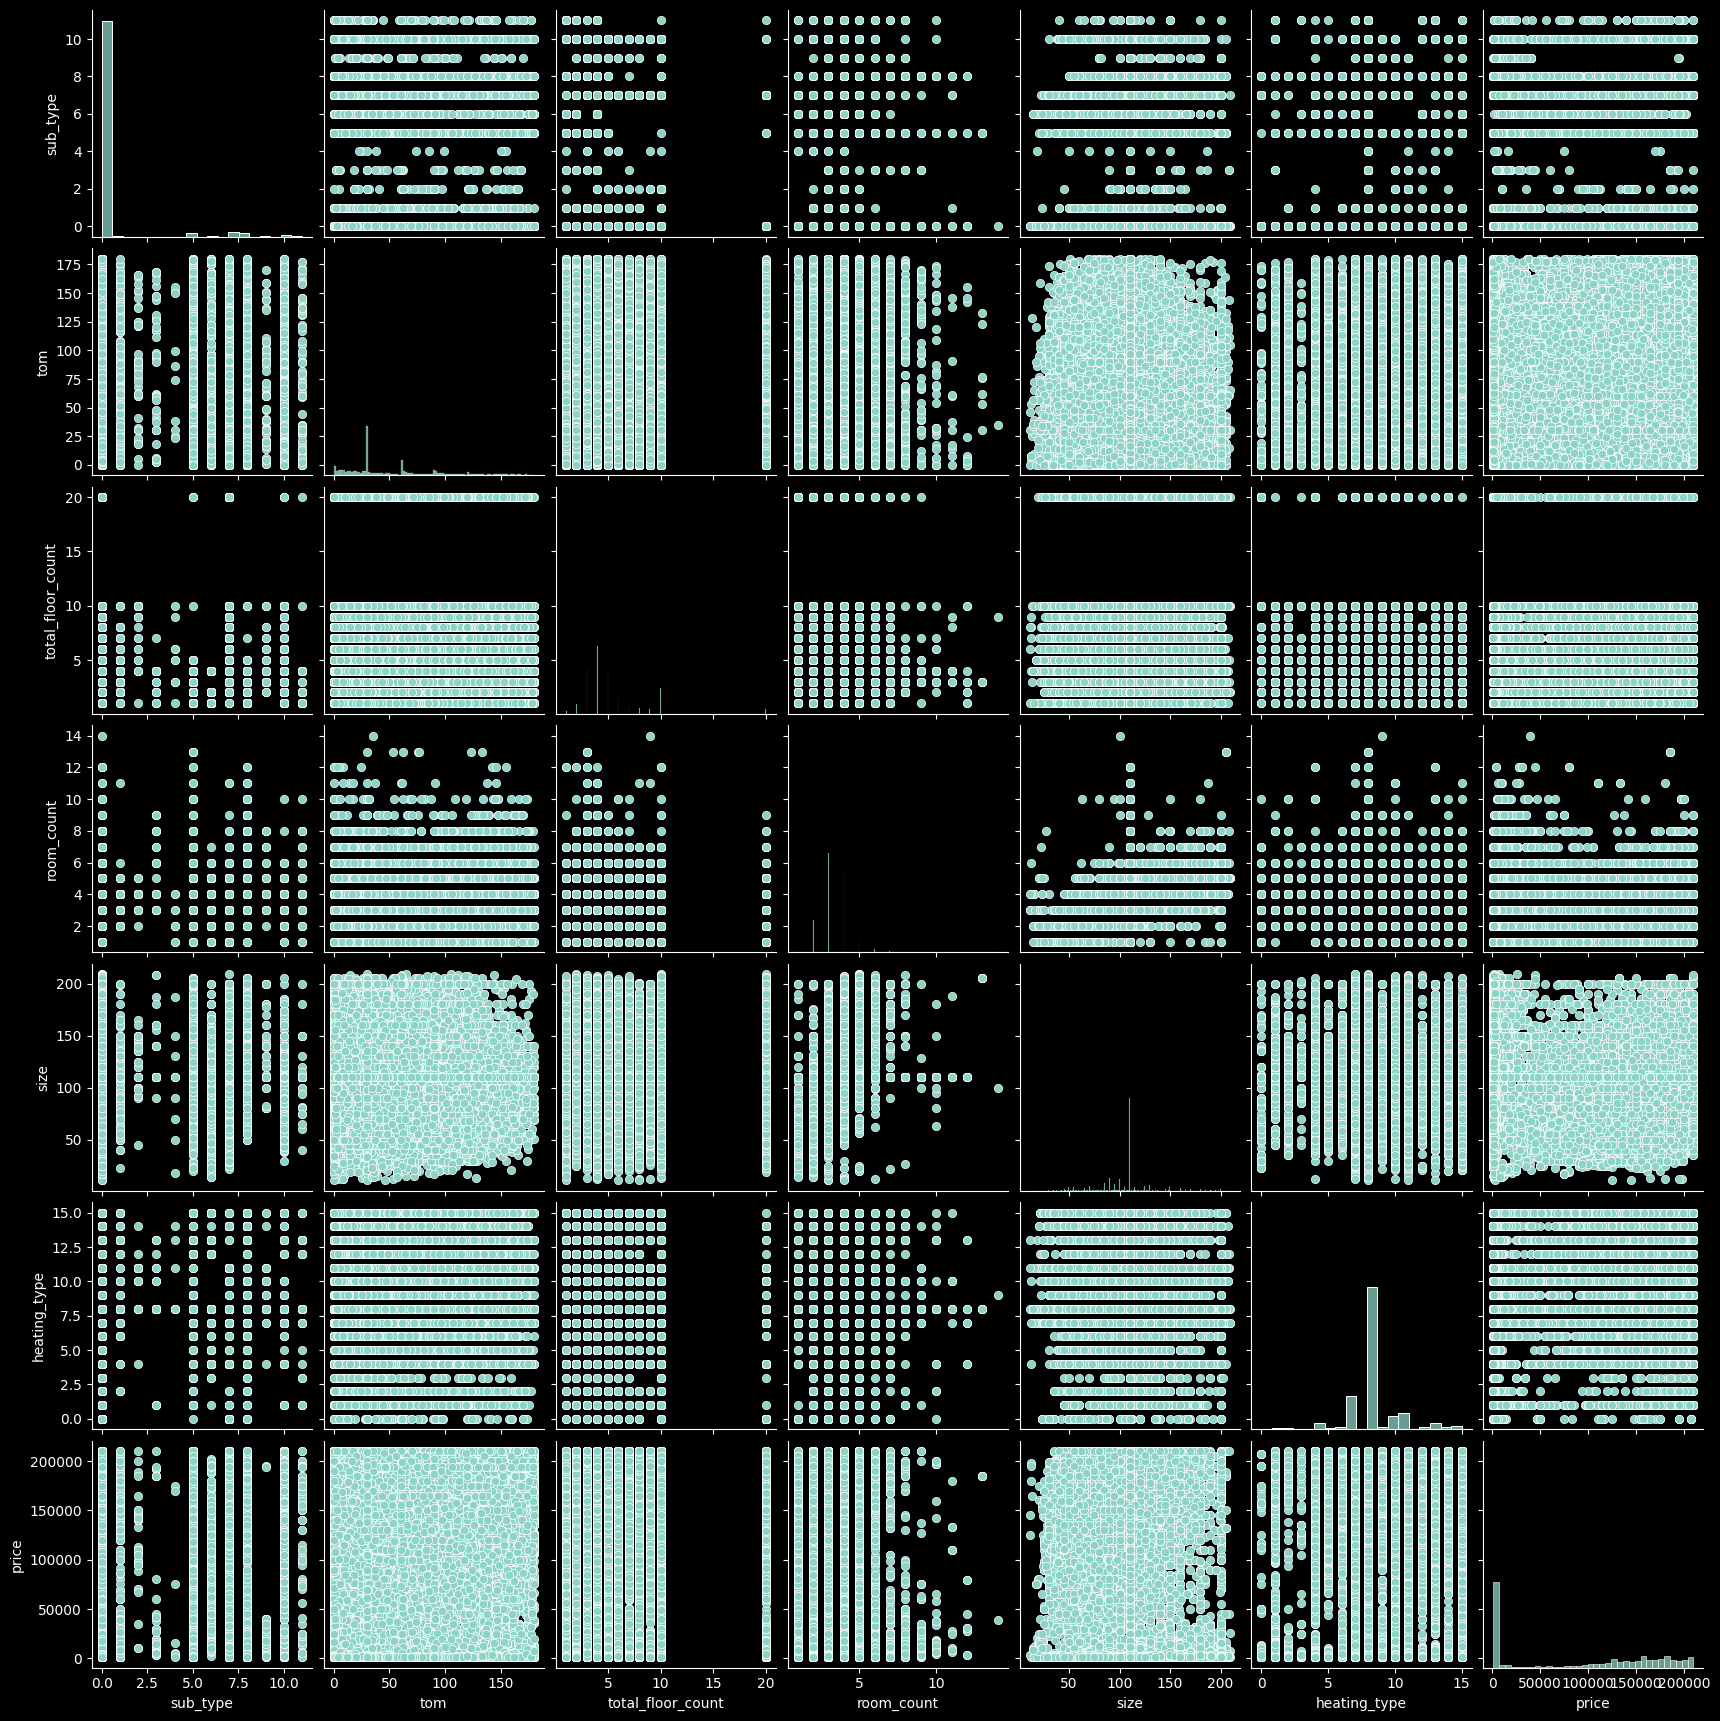

In [80]:
sns.pairplot(df[feature_names])

посмотрим какие признаки более влиятельны для нашей модели

In [52]:
importances = best_model.feature_importances_

In [53]:
std = np.std([tree.feature_importances_ for tree in best_model.estimators_], axis=0)

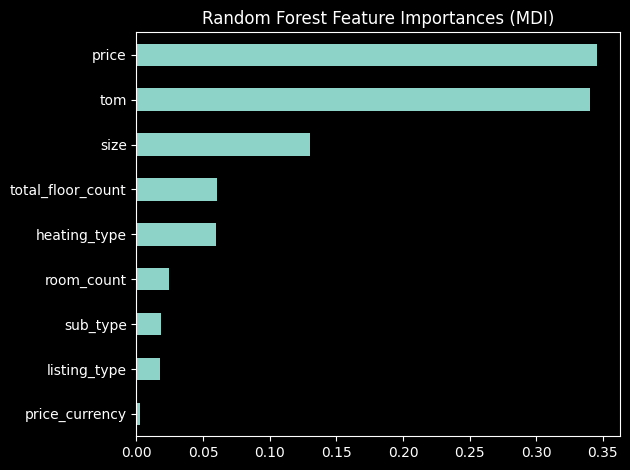

In [54]:
mdi_importances = pd.Series(
    best_model[-1].feature_importances_, index=feature_names
).sort_values(ascending=True)

ax = mdi_importances.plot.barh()
ax.set_title("Random Forest Feature Importances (MDI)")
ax.figure.tight_layout()
plt.show()

на этом графике непонятно кто больше sub_type или listing_type посмотрим на другой график, который точнее покажет их связь на модель

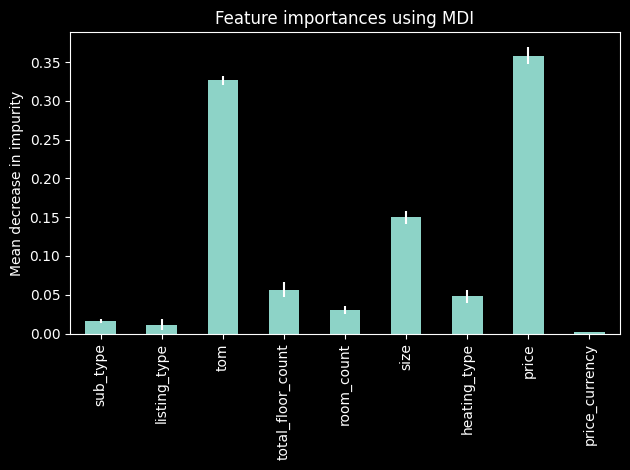

In [55]:
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

sub_type больше значит будем удалять listing_type и price_currency

посмотрим на матрицу предсказаний, просто, что бы понимать в каком соотношении, какие значения предсказывались

<Axes: >

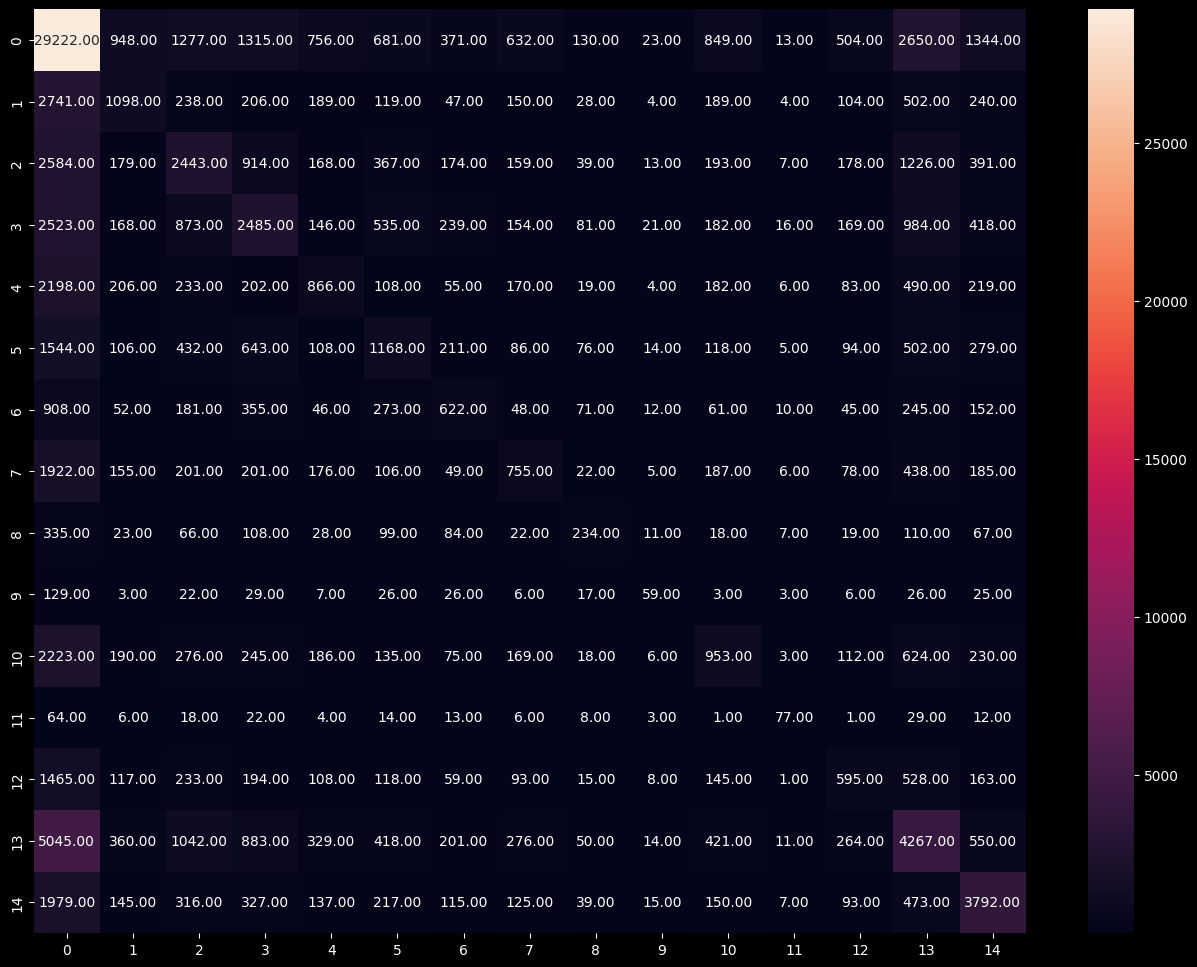

In [56]:
plt.figure(figsize=(16,12))
sns.heatmap(confusion_matrix(test_y,y_pred), annot=True, fmt='.2f')

In [57]:
df_clear = df.drop(["price_currency", "listing_type"], axis = 1)

In [58]:
x = df_clear.drop('building_age',axis=1)
y = df_clear['building_age']

делим опять на тренеровочную и тестувую выборки

In [59]:
train_x, test_x, train_y, test_y = train_test_split(x,y,random_state=100,test_size=0.3,stratify=y)

In [60]:
rf_clf = best_model.fit(train_x,train_y)

обучаем

In [61]:
y_pred = rf_clf.predict(test_x)

посмотрим теперь на показатель точности предсказания он не сильно изменился, но влюбом случае мы избавили модель от лишнего шума

In [62]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.72      0.61     40715
           1       0.28      0.18      0.22      5859
           2       0.30      0.26      0.28      9035
           3       0.30      0.27      0.28      8994
           4       0.26      0.17      0.20      5041
           5       0.26      0.21      0.23      5386
           6       0.26      0.19      0.22      3081
           7       0.26      0.16      0.20      4486
           8       0.28      0.19      0.22      1231
           9       0.28      0.16      0.20       387
          10       0.25      0.17      0.20      5445
          11       0.44      0.25      0.32       278
          12       0.25      0.15      0.18      3842
          13       0.32      0.29      0.31     14131
          14       0.47      0.48      0.47      7930

    accuracy                           0.42    115841
   macro avg       0.32      0.26      0.28    115841
weighted avg       0.38   

посмотрим теперь на важность каждого признака для нашей модели

In [63]:
importances = rf_clf.feature_importances_

In [64]:
feature_names = [i for i in x.columns]

In [65]:
rf_clfstd = np.std([tree.feature_importances_ for tree in rf_clf.estimators_], axis=0)

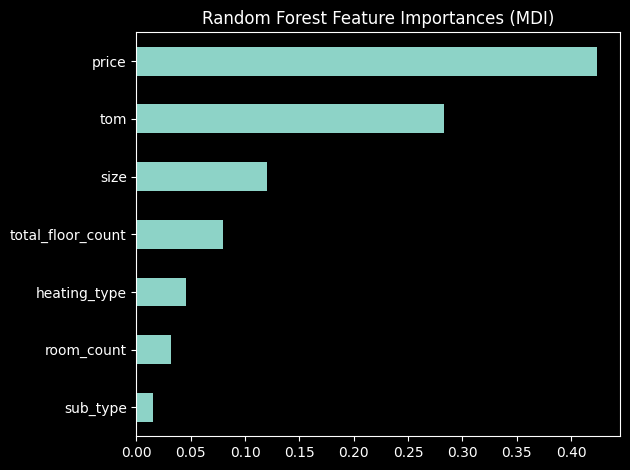

In [66]:
mdi_importances = pd.Series(
    rf_clf[-1].feature_importances_, index=feature_names
).sort_values(ascending=True)

ax = mdi_importances.plot.barh()
ax.set_title("Random Forest Feature Importances (MDI)")
ax.figure.tight_layout()
plt.show()

посмотрим на график выбрасов для нашего нового таргета

<Axes: ylabel='price'>

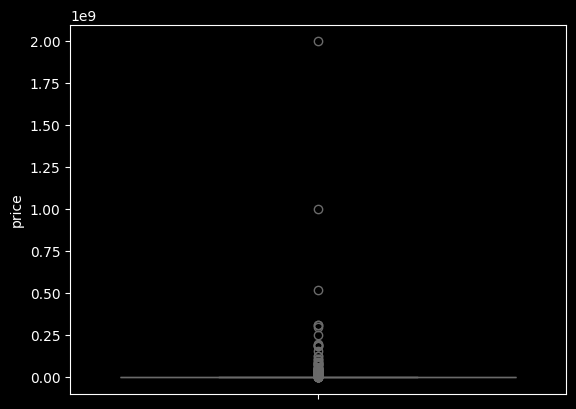

In [67]:
sns.boxplot(df['price'])

здесь мы удалим данные те кто ниже 25% выборки и данные, которые выше 210000 - это число бралось, как самое оптимальное число для выбрасов и точности модели

In [68]:
df.drop(df[df['price'] <= 0].index,inplace=True)

In [69]:
def IQR_p():
  Q1_p = df['price'].quantile(0.25)
  Q3_p = df['price'].quantile(0.75)
  return Q1_p,Q3_p

In [70]:
IQR_p()

(2200.0, 325000.0)

In [71]:
IQR_p()[1]

325000.0

In [72]:
df.drop(df[df['price'] >210000].index,inplace=True)
df.drop(df[df['price'] <IQR_p()[0]].index,inplace=True)

In [73]:
X = df.drop('price',axis=1)
Y = df['price']

разбиваем дата сет на тренировочную и тестувую выборку

In [74]:
train_x, test_x, train_y, test_y = train_test_split(X,Y,random_state=100,test_size=0.3)

определяем наилучшую модель для регрессии

In [75]:
models_reg = {
    'LinearRegression':LinearRegression(n_jobs = -1),
    'Ridge':Ridge(),
    'Lasso':Lasso(),
    'XGBRegressor':XGBRegressor(n_estimators = 500,learning_rate = 0.1, n_jobs = -1, random_state = 111)

}
best_model_r2_score = 0

In [76]:
for name_model_reg, model_reg in models_reg.items():
    y_pred = model_reg.fit(train_x,train_y).predict(test_x)
    r2_scores = r2_score(test_y,y_pred)
    print(f'{name_model_reg}:{r2_scores}')

    if r2_scores > best_model_r2_score:
        best_model_r2_score = r2_scores
        best_model_reg = model_reg
        best_name_model = name_model_reg

print(f'{best_name_model}:{best_model_r2_score}')

LinearRegression:0.857246567167013
Ridge:0.8572466879916402
Lasso:0.8572471217591956
XGBRegressor:0.8927268981933594
XGBRegressor:0.8927268981933594


это оказалась модель XGBRegressor для, которой параметр n_estimators = 500 брался то же путем нахождения оптимального, точность 0,89 или 89%

In [77]:
np.random.seed(100)
best_model_reg.fit(train_x,train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=-1,
             num_parallel_tree=None, random_state=111, ...)

обучаем

In [78]:
y_pred = best_model_reg.predict(test_x)

посмотрим на абсолютную ошибку и точность регрессии

In [79]:
pd.DataFrame({'mean_absolute_error':[mean_absolute_error(test_y,y_pred)],
              'coef_determination':[r2_score(test_y,y_pred)]})

,mean_absolute_error,coef_determination
0,17023.615234,0.892727
